In [ ]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt

## Gaussian White Noise 
Working with approximating an I.I.D discrete time poisson process by a Gaussian process. 
Populated an array with delta values and computed an average over discrete time steps. In order to compute the limit, rather than decreasing the time interval size it was simpler to just increase the number of intervals, calculate each average and scale it down as needed.

Changing the 'intervals' vairable is representative of taking the infinitesimal limit of time intervals. For large values we see this process represnt Gaussian White Noise.

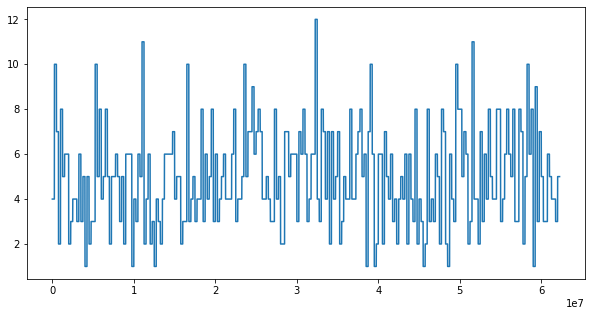

In [ ]:
intervals = 250 # number of seconds
T = 1000 * intervals # 10 seconds split each into 1000ms
dt = 0.1 
time = np.arange(0, T, dt) # time array
x = [] # stores the average value of spikes in time intervales of T/intervals
R = 0.005 # fixed rate of expected spikes
Rdt = R*dt # expected probability that a spike occurs in 1x10^-4 secs
ctr = 0
for j in range(0, intervals-1):
    for i in range(0, int((T/intervals)/dt)-1): # count the number of spikes in 1 sec checking every 1x10^-4 sec
        if int(bool((Rdt > np.random.rand()))) == 1:
            ctr += 1
    x[j*T:(j+1)*T-1] = [ctr] * T # for each 1000ms sets the value of the number of spikes that occured
    ctr = 0   
figure = plt.figure(figsize = (10,5))    
plt.plot(x)

## Theoretical Stochastic Model
Attempting to simulate the stochastic model of a neurone firing using a differential voltage equation representative of the theory $$\frac{dV}{dt} = - \frac{V}{\tau_m} + a\sum_{t_{sk}}^{}\delta(t-t_1)$$  

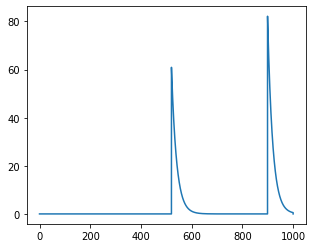

In [ ]:
sim_time = 1000 # 1 second run time
dt = 0.1 # interval size of 1x10^(-4)
time = np.arange(0, sim_time, dt)

tau = 20 # time constant
a = 0.5 # spike amplitude constant
R = 5/1000 # expected rate of spikes
Rdt = R*dt # expected probability of a spike in an interval

V1 = np.zeros(int(sim_time/dt)) # container for voltages


for i in range(0, int(sim_time/dt) - 1):
    V1[i+1] = V1[i] + dt*(-V1[i]/tau + np.random.rand()*int(bool(Rdt > np.random.rand())))

for i in range(0, len(V1)-1):
  V1[i] *= 1000


figure = plt.figure(figsize = (5, 4))
plt.plot(time, V1)


## Approximation Using Gaussian White Noise
We attempt to discretise our Poisson distributed events with fixed rate R in such a way that we can express $$E[\sum_{t_{sk}}^{}\delta(t-t_1)] = R\Delta + \phi_k\sqrt{R\Delta}$$ with a discrete interval $\Delta$ and unit Gaussian number $\phi_k$ with mean 0 and variance 1. This approximation holds as long as $R\Delta >> 1$.

The resulting stochastic differential equation is of the form $$\frac{dV}{dt} = \frac{Ra\tau - V}{\tau_m} + a\sqrt{R}\xi(t)$$ where $$ \xi(t) = \lim_{\Delta \to 0} \frac{\phi_i}{\sqrt{\Delta}} $$

Its Euler method can be written as $$V(t+\Delta) = V_k + \frac{\Delta}{\tau_m}(aR\tau_m - V_k) + a\sqrt{R\Delta}\phi_k$$




Text(0.5, -10.19999999999999, 'Time')

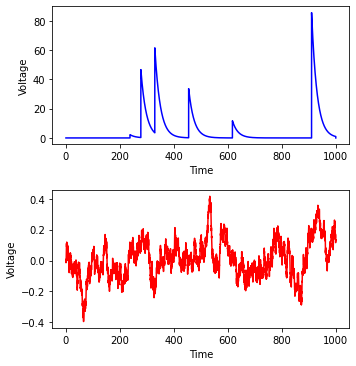

In [ ]:
V2 = np.zeros(int(sim_time/dt))

for i in range(0, int(sim_time/dt) - 1):
    V2[i+1] = V2[i] + (dt/tau)*(R*a*tau - V2[i]) + (a*np.sqrt(Rdt)*np.random.normal(0, 1))
    

figure = plt.figure(figsize = (5,5))
plt.subplot(211)
plt.tight_layout()
plt.plot(time, V1, color = 'blue', label = 'Poisson')
plt.ylabel('Voltage')
plt.xlabel('Time')
plt.subplot(212)
plt.tight_layout()
plt.plot(time, V2, color = 'red', label = 'Gaussian')
plt.ylabel('Voltage')
plt.xlabel('Time')

## Statistical Evaluation
It is now important to check that both our models behave the same statistically like we would expect. The voltage equation can be written in terms of voltage variance in the same form as the Ornstein-Uhlenbeck process.
$$\tau\frac{dV}{dt} = \tau{aR} - V + \tau{a}\sqrt{R}\xi(t)$$
where we consider the form $$ \tau\frac{dV}{dt} = \mu - V +\sigma\sqrt{2\tau}\xi(t) $$ giving us that $$ \langle V\rangle = aR\tau$$ and $$ \langle V^2\rangle = \frac{\tau{a^2R}}{2}$$

In [ ]:
mean = a*R*tau
var = tau*a**2*R/2
print("Theoretical mean:  " + str(mean))
print("Theoretical Variance:  " + str(var))
print("\nMean of approximated values (V2): " + str(sum(V2)/len(V2))*10)
print("Variance of approximated values (V2): " + str(np.var(V2))*10)



Theoretical mean:  0.25
Theoretical Variance:  0.125

Mean of approximated values (V2): 0.32919688084318170.32919688084318170.32919688084318170.32919688084318170.32919688084318170.32919688084318170.32919688084318170.32919688084318170.32919688084318170.3291968808431817
Variance of approximated values (V2): 0.125723032473311370.125723032473311370.125723032473311370.125723032473311370.125723032473311370.125723032473311370.125723032473311370.125723032473311370.125723032473311370.12572303247331137
